<a href="https://colab.research.google.com/github/janiahharris205/predictive-analysis-of-treasury-bills/blob/main/Predictive_Analysis_of_Treasury_Bills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction

Goal: Predict Treasury bill rates using historical data using deep learning models.\
Data range: July 2014 - July 2024\
Models used: Artificial Neural Network, Convolutional Neural Network,
3D Convolutional Neural Network, Reccurent Neural Network\
Features: Treasury bill rates, Interest rates, GDP, Natural gas consumption, Gold export price index, Gas prices, and Inflation rates\
Real-World Impact: This analysis demonstrates the potential for deep learning models to aid in financial forecasting and trading strategies by accurately predicting Treasury bill rates based on economic indicators.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Collection
Sources:
Federal Reserve Economic Data for Treasury bill rates, GDP, inflation, interest rates, gasoline prices, natural gas consumption, and the export price index of gold from July 2014-July 2024.

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/10yr-Financial-Data.xlsx', na_values=["", "N/A", "None"])

##note for dr. akinyemi
link to dataset: https://docs.google.com/spreadsheets/d/1S326QXT4EXwWX0OFgeJz9c_1wSSdZd47/edit?usp=sharing&ouid=105466492836746841627&rtpof=true&sd=true

In [ ]:
data.shape

(2610, 8)

In [ ]:
data.head()

,OBSERVATION_DATE,TREASURY_BILL_RATE,INTEREST_RATE,INFLATION_RATE,GDP,GAS_PRICES,NATURALGAS_CONSUMPTION,GOLD_EPI
0,2014-07-01,0.02,0.10,2.26,17804.228,3.704,2075.5,461.6
1,2014-07-02,0.02,0.10,2.26,17804.228,3.704,2075.5,461.6
2,2014-07-03,0.01,0.09,2.28,17804.228,3.704,2075.5,461.6
3,2014-07-04,NaN,NaN,NaN,NaN,NaN,2075.5,461.6
4,2014-07-07,0.04,0.10,2.27,17804.228,3.678,2075.5,461.6


In [ ]:
data.tail()

,OBSERVATION_DATE,TREASURY_BILL_RATE,INTEREST_RATE,INFLATION_RATE,GDP,GAS_PRICES,NATURALGAS_CONSUMPTION,GOLD_EPI
2605,2024-06-25,5.23,5.33,2.22,29016.714,3.438,2812.9,817.5
2606,2024-06-26,5.24,5.33,2.26,29016.714,3.438,2812.9,817.5
2607,2024-06-27,5.23,5.33,2.26,29016.714,3.438,2812.9,817.5
2608,2024-06-28,5.22,5.33,2.28,29016.714,3.438,2812.9,817.5
2609,2024-07-01,5.24,5.33,2.32,29374.914,3.479,2846.7,819.7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OBSERVATION_DATE        2610 non-null   datetime64[ns]
 1   TREASURY_BILL_RATE      2502 non-null   float64       
 2   INTEREST_RATE           2502 non-null   float64       
 3   INFLATION_RATE          2502 non-null   float64       
 4   GDP                     2604 non-null   float64       
 5   GAS_PRICES              2607 non-null   float64       
 6   NATURALGAS_CONSUMPTION  2610 non-null   float64       
 7   GOLD_EPI                2610 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 163.3 KB


In [ ]:
data_cleaned = data.dropna()
data_cleaned.to_csv('cleaned_dataset.csv', index=False)
data.isnull().sum()

,0
OBSERVATION_DATE,0
TREASURY_BILL_RATE,108
INTEREST_RATE,108
INFLATION_RATE,108
GDP,6
GAS_PRICES,3
NATURALGAS_CONSUMPTION,0
GOLD_EPI,0


In [ ]:
print(f"Original dataset had {len(data)} rows.")
print(f"Cleaned dataset has {len(data_cleaned)} rows.")

Original dataset had 2610 rows.
Cleaned dataset has 2501 rows.


Axes(0.125,0.11;0.698618x0.77)


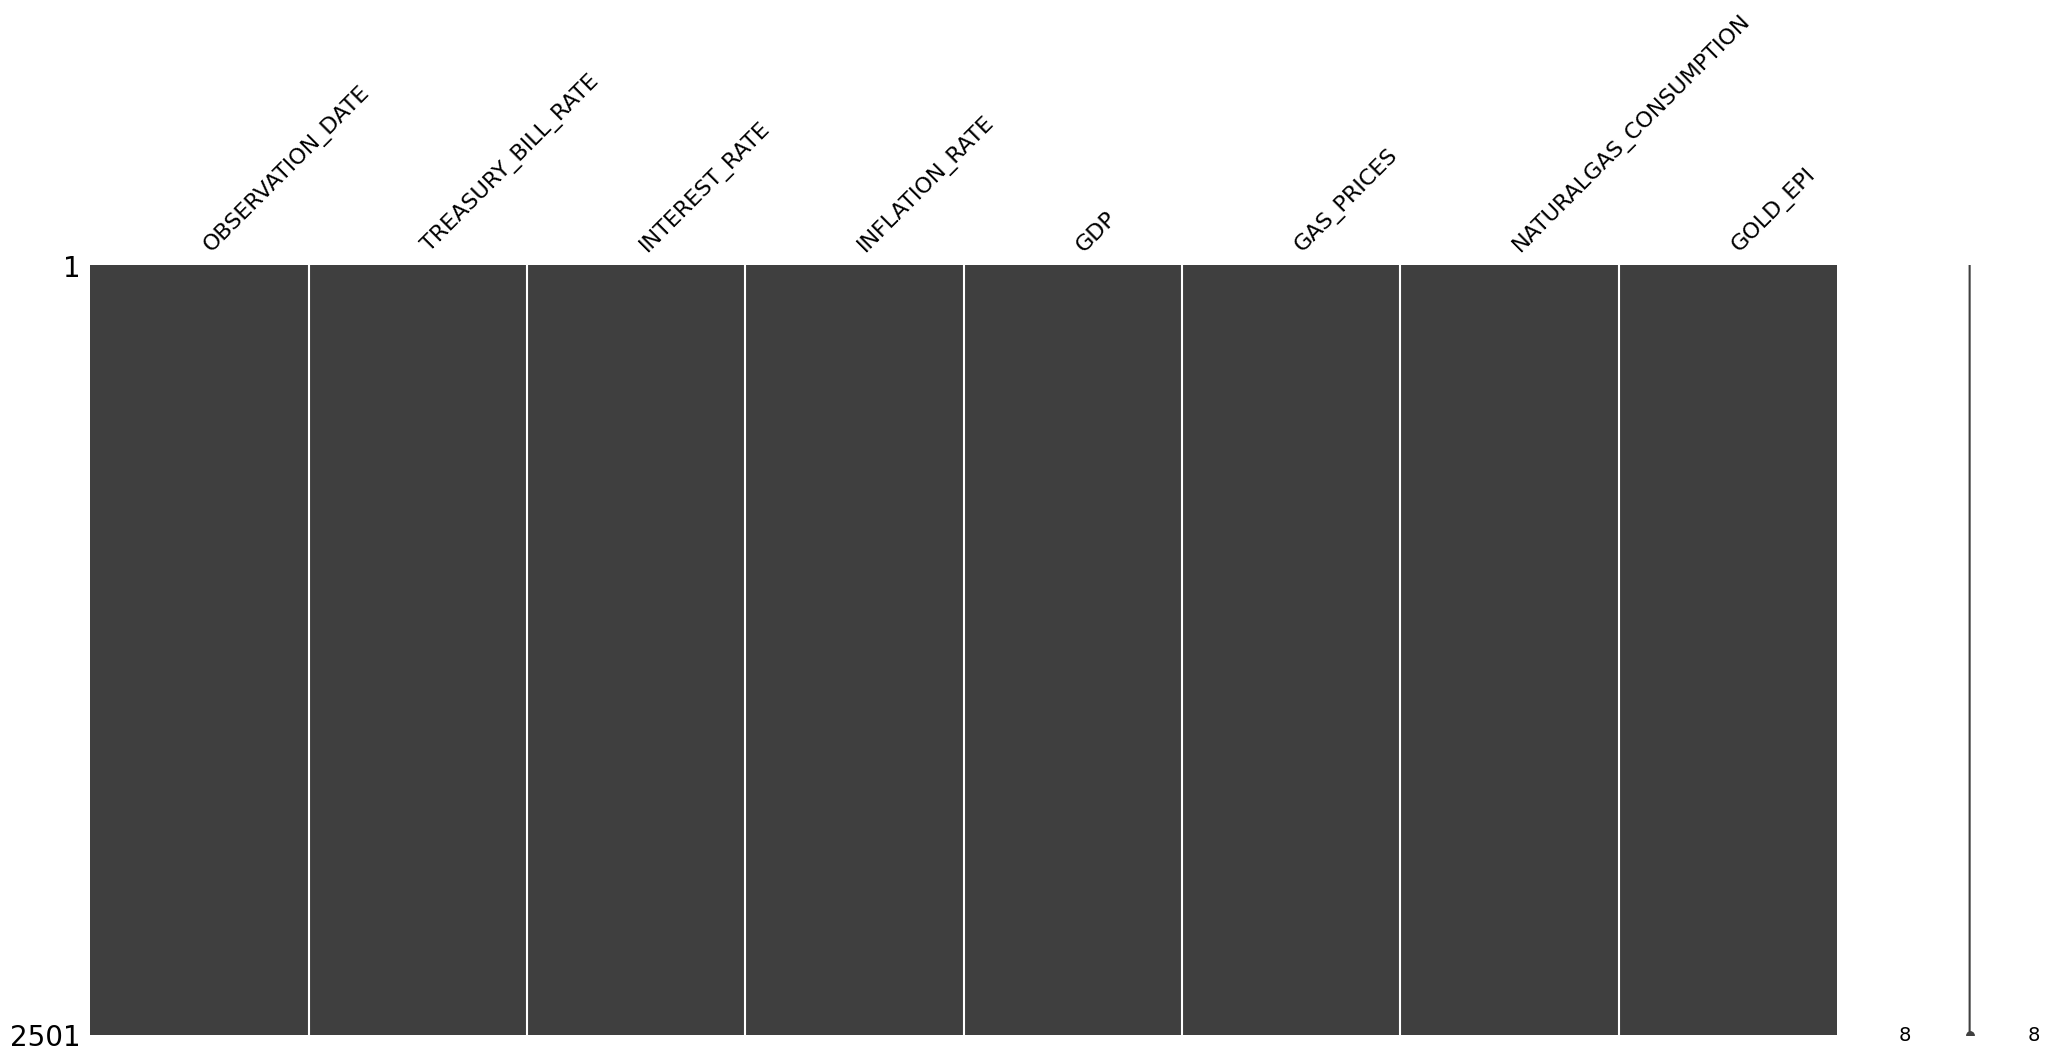

In [ ]:
#visualize Missing Values
import missingno as msno
print(msno.matrix(data_cleaned))

#Exploratory Data Analysis

DTB3 - treasure bille rates\
EFFR - Effective Federal Funds Rate\
T10YIE - 10yr inflation rates\
GDP - gdp\
GASREGW - gas prices\
NATURALGAS - natural gas consumption\
GOLD - export price index of gold

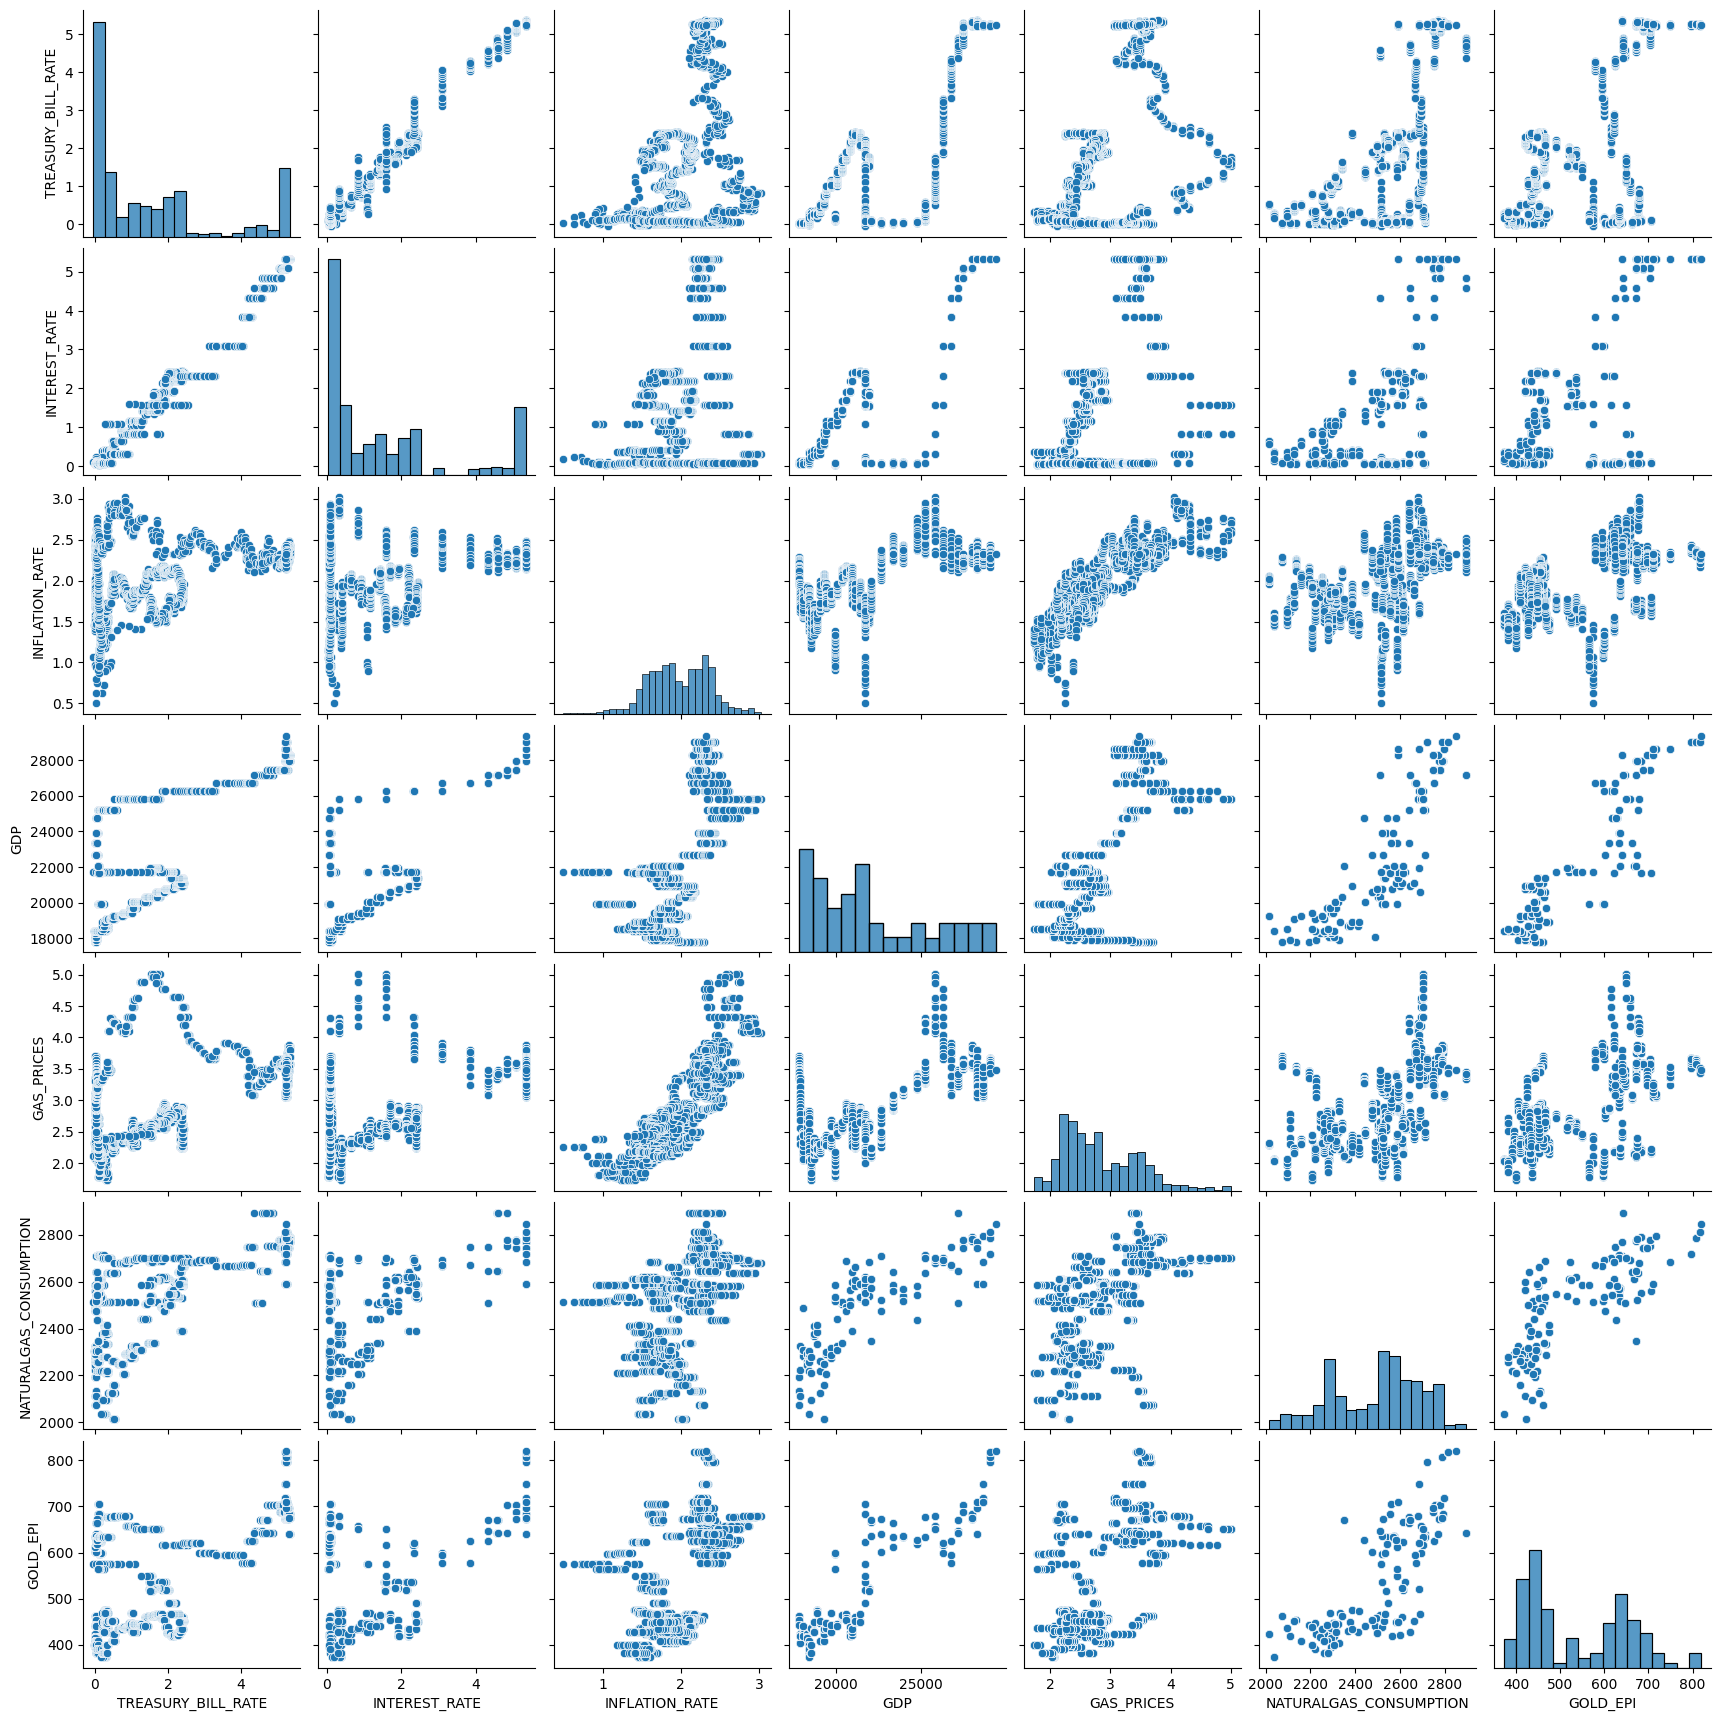

In [ ]:
#visualize relationships
sns.pairplot(data_cleaned)
plt.show()

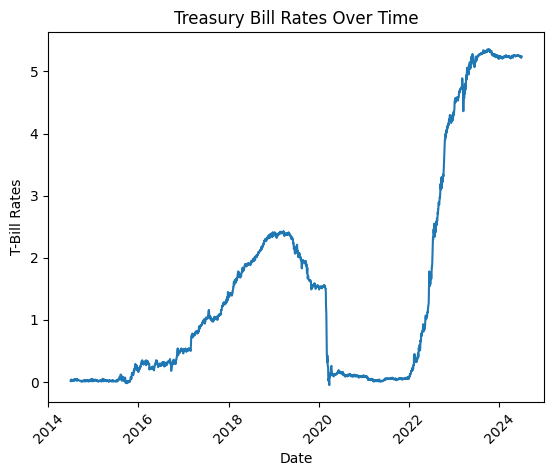

In [ ]:
#treasury Bill Rates over time
sns.lineplot(x="OBSERVATION_DATE", y="TREASURY_BILL_RATE", data=data_cleaned)
plt.title("Treasury Bill Rates Over Time")
plt.xlabel("Date")
plt.ylabel("T-Bill Rates")
plt.xticks(rotation=45)
plt.show()

T-Bill rates dropped drastically during the pandemic, but made a recovery during 2022.

In [ ]:
#association between treasury bill rates and other variables
target = 'TREASURY_BILL_RATE'
if data[target].dtype in ['float64', 'int64']:
    correlation_with_target = data.corr()[target]
    print(f'Correlation with {target}:\n', correlation_with_target)

Correlation with TREASURY_BILL_RATE:
 OBSERVATION_DATE          0.675696
TREASURY_BILL_RATE        1.000000
INTEREST_RATE             0.995223
INFLATION_RATE            0.402737
GDP                       0.775734
GAS_PRICES                0.511451
NATURALGAS_CONSUMPTION    0.644000
GOLD_EPI                  0.516549
Name: TREASURY_BILL_RATE, dtype: float64


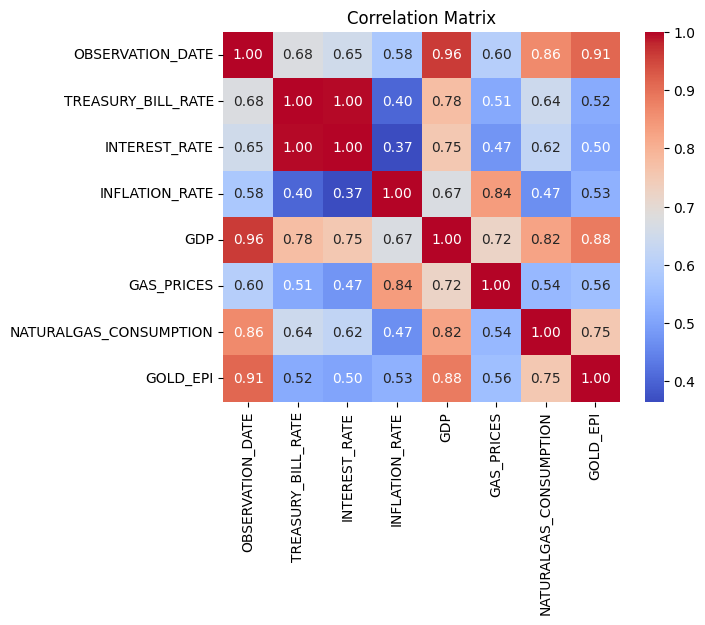

In [ ]:
#heatmap for correlation
correlation = data_cleaned.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Interest rates and GDP have a high correlation while gas prices, natural gas consumption, and the export price index of gold have a moderate correlation. Inflation rates have a low correlation.

#Feature Engineering

In [ ]:
target = 'TREASURY_BILL_RATE'
features = ['INTEREST_RATE','INFLATION_RATE', 'GDP', 'GAS_PRICES', 'NATURALGAS_CONSUMPTION', 'GOLD_EPI']

In [ ]:
#split the data
X = data_cleaned[features]
y = data_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Interest rates, gdp, natural gas cunsumption, gold epi, and gas prices will be used as training features because they have a high to moderate correlation.

#Artificial Neural Network - ANN

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1)  #regression output
])

#compile
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error', metrics=['mae'])

#train
history = model.fit(
    X_train_scaled, y_train,
    epochs=35,
    batch_size=55,
    validation_split=0.2,
    verbose=1
)

Epoch 1/35


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.2942 - mae: 1.6763 - val_loss: 5.5642 - val_mae: 1.5982
Epoch 2/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.6003 - mae: 1.4474 - val_loss: 3.3966 - val_mae: 1.3303
Epoch 3/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5580 - mae: 1.1401 - val_loss: 1.5962 - val_mae: 0.9984
Epoch 4/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4500 - mae: 0.9276 - val_loss: 0.5824 - val_mae: 0.6397
Epoch 5/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9647 - mae: 0.7470 - val_loss: 0.2938 - val_mae: 0.4512
Epoch 6/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7557 - mae: 0.6226 - val_loss: 0.1808 - val_mae: 0.3396
Epoch 7/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6011 - mae: 0.5499 - val_loss: 0.1101 - val_mae: 0.2547
Epoch 8/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5559 - mae: 0.5052 - val_loss: 0.1007 - val_mae: 0.2249
Epoch 9/35
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5176 - mae: 0.4907 - v

Number of layers: 4\
Number of neurons: 64, 32, 16\
Activation functions: ReLU\
Dropout rate: 0.3\
Optimizer: Adam with a learning rate of 0.0005\
Epochs: 35\
Batch size: 55

#Evaluation of ANN

In [ ]:
y_pred = model.predict(X_test_scaled)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Mean Absolute Error (MAE): 0.17549235050133363
Mean Squared Error (MSE): 0.06035611893295634
Root Mean Squared Error (RMSE): 0.24567482356349896
R-Squared (R2): 0.9823062594114595


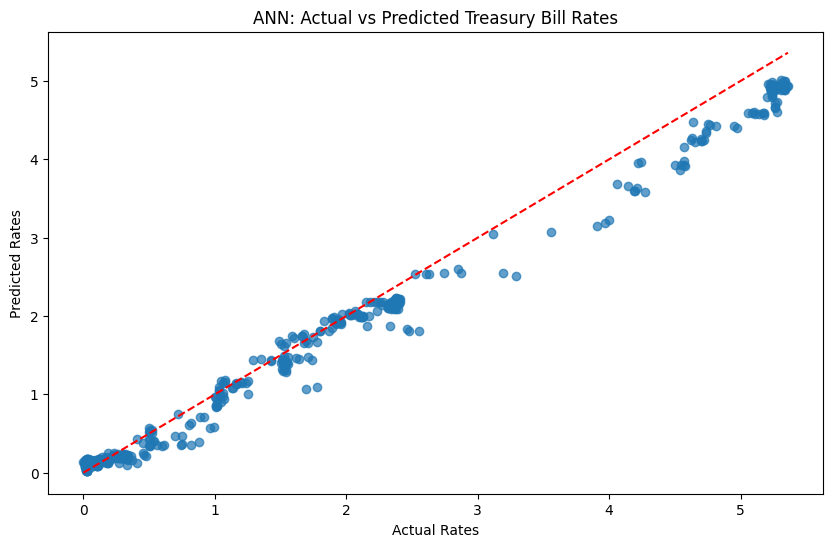

In [ ]:
#model Performance
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared (R2):", r2_score(y_test, y_pred))

#visualize Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("ANN: Actual vs Predicted Treasury Bill Rates")
plt.xlabel("Actual Rates")
plt.ylabel("Predicted Rates")
plt.show()

The MAE and MSE are low showing that the model mokes percise predictions. The model has an R-squared of .98, so it fits the dataset very well. My concern is that there may be overfitting.

#Convolutional Neural Network - CNN

In [ ]:
#reshape input data for CNN
#X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
#X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))


In [ ]:
X_train_scaled_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [ ]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled_cnn.shape[1], 1)),
    Dropout(0.3),
    Conv1D(filters=32, kernel_size=2, activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(16, activation='relu'),
    Dense(1)  #regression output
])

#compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

#train the model
history = model.fit(X_train_scaled_cnn, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.6808 - mae: 1.1542 - val_loss: 0.1451 - val_mae: 0.2913
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3232 - mae: 0.4415 - val_loss: 0.0665 - val_mae: 0.2023
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2350 - mae: 0.3502 - val_loss: 0.0626 - val_mae: 0.1820
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1914 - mae: 0.3161 - val_loss: 0.0339 - val_mae: 0.1315
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1714 - mae: 0.2961 - val_loss: 0.0362 - val_mae: 0.1473
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1570 - mae: 0.2814 - val_loss: 0.0268 - val_mae: 0.1239
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1356 - mae: 0.2628 - val_loss: 0.0286 - val_mae: 0.1261
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1325 - mae: 0.2559 - val_loss: 0.0270 - val_mae: 0.1228
Epoch 9/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1122 

Number of layers: 5\
Number of neurons: 64, 32, 16\
Activation functions: ReLU\
Dropout rate: 0.3\
Optimizer: Adam with a learning rate of 0.001\
Epochs: 50\
Batch size: 16

#Evaluation of CNN

In [ ]:
y_pred = model.predict(X_test_scaled)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


Mean Absolute Error (MAE): 0.08730862197107421
Mean Squared Error (MSE): 0.0155182757140696
Root Mean Squared Error (RMSE): 0.12457237139137073
R-Squared (R2): 0.9954507289447952


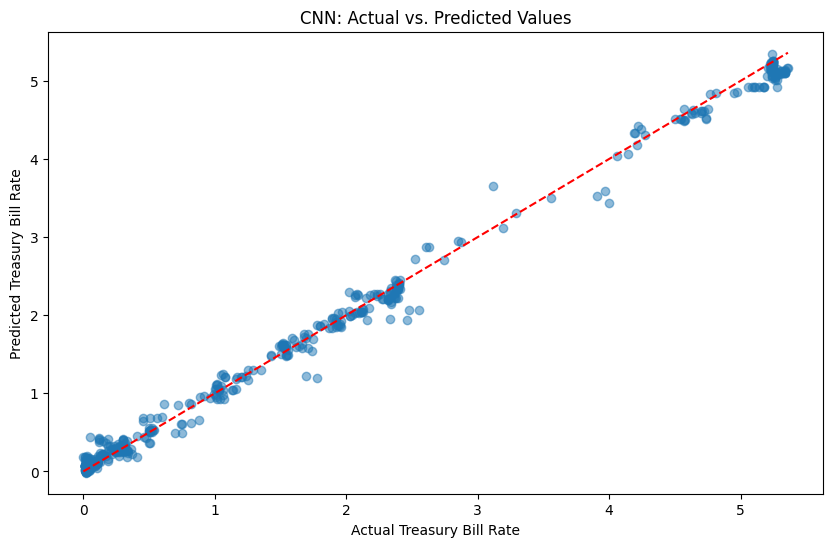

In [ ]:
#model Performance
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R-Squared (R2):", r2_score(y_test, y_pred))

#scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Treasury Bill Rate')
plt.ylabel('Predicted Treasury Bill Rate')
plt.title('CNN: Actual vs. Predicted Values')
plt.show()

I assumed that the ANN woould perform better than the CNN because I had only ever used CNN for image classification. The CNN performed so well because it captures sequential dependencies in data, making it useful for identifying patterns in time-series features.

#3D Convolutional Neural Network - (3D CNN)

In [ ]:
def create_3d_dataset(X, y, time_steps=3, stride=1):
    X_3d = []
    y_new = []

    #convert to numpy arrays if they aren't already
    X = np.array(X)
    y = np.array(y)

    #calculate the number of valid windows
    n_samples = (X.shape[0] - time_steps) // stride + 1

    #arrange features in a 2x3 grid
    height, width = 2, 3

    for i in range(n_samples):
        start_idx = i * stride
        end_idx = start_idx + time_steps

        if end_idx <= len(X):
            X_window = X[start_idx:end_idx]
            #ensure the window has the correct shape
            if len(X_window) == time_steps:
                X_reshaped = X_window.reshape(time_steps, height, width, 1)
                X_3d.append(X_reshaped)
                y_new.append(y[end_idx - 1])

    return np.array(X_3d), np.array(y_new)

In [ ]:
#reshape your data
time_steps = 3  #number of time steps to consider
X_train_3d, y_train_new = create_3d_dataset(X_train_scaled, y_train, time_steps)
X_test_3d, y_test_new = create_3d_dataset(X_test_scaled, y_test, time_steps)

In [ ]:
print("3D shapes:", X_train_3d.shape, y_train_new.shape)


3D shapes: (1998, 3, 2, 3, 1) (1998,)


In [ ]:
model = Sequential([
    Conv3D(
        filters=32,
        kernel_size=(2, 2, 2),
        activation='relu',
        input_shape=(time_steps, 2, 3, 1),
        padding='same'
    ),
    MaxPooling3D(pool_size=(1, 2, 2)),
    Dropout(0.3),
    Conv3D(
        filters=64,
        kernel_size=(2, 2, 2),
        activation='relu',
        padding='same'
    ),
    MaxPooling3D(pool_size=(1, 1, 1)),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1)
])

#compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='mean_squared_error',
    metrics=['mae']
)

#train the model
history = model.fit(
    X_train_3d,
    y_train_new,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 4.1330 - mae: 1.3646 - val_loss: 1.9222 - val_mae: 1.1429
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6360 - mae: 1.0104 - val_loss: 1.2990 - val_mae: 0.9100
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.3344 - mae: 0.8887 - val_loss: 0.7588 - val_mae: 0.6908
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.8818 - mae: 0.7166 - val_loss: 0.5318 - val_mae: 0.5225
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6480 - mae: 0.6116 - val_loss: 0.4763 - val_mae: 0.4771
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6219 - mae: 0.5822 - val_loss: 0.4217 - val_mae: 0.4563
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5322 - mae: 0.5579 - val_loss: 0.3967 - val_mae: 0.4491
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5040 - mae: 0.5471 - val_loss: 0.3405 - val_mae: 0.4261
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3983 - mae: 0.49

Number of layers: 5\
Number of neurons: 64, 32\
Activation functions: ReLU\
Dropout rate: 0.3, 0.4\
Optimizer: Adam with a learning rate of 0.0005\
Epochs: 50\
Batch size: 32

#Evaluation of 3D CNN

In [ ]:
y_pred = model.predict(X_test_3d)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Mean Squared Error (MSE): 0.0596397252363218
Mean Absolute Error (MAE): 0.1865673856744785
Root Mean Squared Error (RMSE): 0.24421245921599044
R-squared Score: 0.9825563592516844


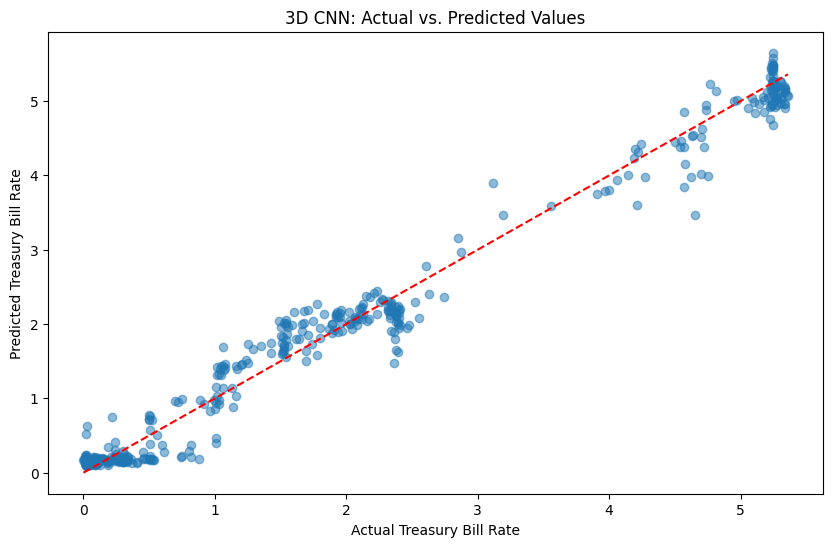

In [ ]:
#evaluate Model
print("Mean Squared Error (MSE):", mean_squared_error(y_test_new, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_new, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_new, y_pred)))
print("R-squared Score:", r2_score(y_test_new, y_pred))

#scatter Plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_new, y_pred, alpha=0.5)
plt.plot([min(y_test_new), max(y_test_new)], [min(y_test_new), max(y_test_new)], color='red', linestyle='--')
plt.xlabel('Actual Treasury Bill Rate')
plt.ylabel('Predicted Treasury Bill Rate')
plt.title('3D CNN: Actual vs. Predicted Values')
plt.show()


#Reccurent Neural Network - RNN

In [ ]:
#reshape
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

#split
#X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
#build RNN
model = Sequential([
    LSTM(64, activation='relu', input_shape=(1, len(features))),
    Dense(32, activation='relu'),
    Dense(1)
])

#compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 3.9577 - val_loss: 1.8686
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.1026 - val_loss: 0.2002
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1247 - val_loss: 0.0448
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0441 - val_loss: 0.0283
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0268 - val_loss: 0.0207
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0227 - val_loss: 0.0168
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0193 - val_loss: 0.0146
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - val_loss: 0.0133
Epoch 9/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0144 - val_loss: 0.0122
Epoch 10/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - val_loss: 0.0117
Epoch 11/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0137 - val_loss: 0.0111
Epoch 12/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0153 - val_l

In [ ]:
loss = model.evaluate(X_test_reshaped, y_test)
print(f"Test loss: {loss}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0053 
Test loss: 0.0057832421734929085


#Evaluation of RNN

In [ ]:
predictions = model.predict(X_test_reshaped)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Mean Absolute Error: 0.04822086578000806

Model Evaluation Metrics:
Mean Squared Error (MSE): 0.005783241596578992
Mean Absolute Error (MAE): 0.04822086578000806
Root Mean Squared Error (RMSE): 0.07604762715942551
R-squared Score: 0.9983046097333662


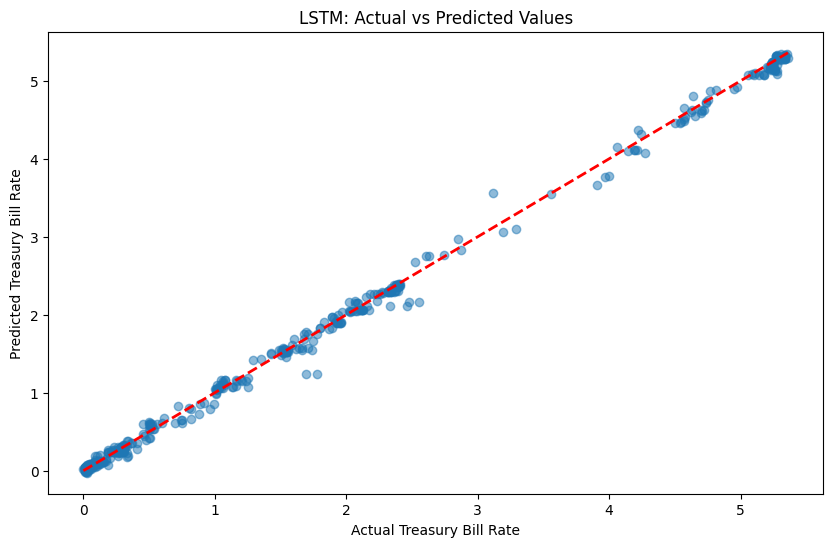

In [ ]:
mae = np.mean(np.abs(predictions - y_test.values.reshape(-1, 1)))
print(f"Mean Absolute Error: {mae}")

print("\nModel Evaluation Metrics:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
print("R-squared Score:", r2_score(y_test, predictions))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Actual Treasury Bill Rate')
plt.ylabel('Predicted Treasury Bill Rate')
plt.title('LSTM: Actual vs Predicted Values')
plt.show()

#Conclusion

The goal of this project was to predict Treasury bill rates (T-bill) using historical financial and commodity data, and explore relationships between T-bill rates and gas prices and the export price index of gold using deep learning models.

RNN had the best performance:\
Lowest MAE: 0.006\
Lowest MSE: 0.048\
Lowest RMSE: 0.076\
Highest R² score: 0.998

CNN had the good performance:\
MAE: 0.097\
MSE: 0.017\
RMSE: 0.13\
R² score: 0.995

ANN had a good but lower performance:\
MAE: 0.172\
MSE: 0.056\
RMSE: 0.24\
R² score: 0.983

3D CNN performed similarly to the ANN:\
MAE: 0.074\
MSE: 0.207\
RMSE: 0.272\
R² score: 0.978

Interest rates, GDP, and natural gas consumption had the strongest correlations with T-bill rates, while gas prices and the export price index of gold contributed moderately to the model's performance. Inflation rates had the lowest correlation with T-bill rates.

Interest rates showed the strongest correlation with Treasury bill rates (0.995), making it the most important predictor. The RNN architecture best captured the relationships between economic indicators and Treasury bill rates. All models achieved R² scores above 0.97, indicating strong predictive capability.